In [3]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [4]:
# continuous_factory_process.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('data/continuous_factory_process.csv', delimiter=',')
df1.dataframeName = 'continuous_factory_process.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 14088 rows and 116 columns


In [5]:
df1.head(5)

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [6]:
# deleting the first column

df1 = df1.drop(columns = ['time_stamp'], axis = 1)

# checking the shape of the data after deleting a column
df1.shape

(14088, 115)

In [7]:
#See if there is any missing values that will cause issues
nullval_count_column = (df1.isnull().sum())
nullval_count_column

AmbientConditions.AmbientHumidity.U.Actual       0
AmbientConditions.AmbientTemperature.U.Actual    0
Machine1.RawMaterial.Property1                   0
Machine1.RawMaterial.Property2                   0
Machine1.RawMaterial.Property3                   0
                                                ..
Stage2.Output.Measurement12.U.Setpoint           0
Stage2.Output.Measurement13.U.Actual             0
Stage2.Output.Measurement13.U.Setpoint           0
Stage2.Output.Measurement14.U.Actual             0
Stage2.Output.Measurement14.U.Setpoint           0
Length: 115, dtype: int64

In [8]:
#filter the y variables (Output measurement actuals) for prediction 

df2=df1.filter(regex='Stage1', axis=1).filter(regex='Actual', axis=1)
df2

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,12.72,0.0,12.16,21.97,0.00,0.0,3.82,2.94,20.82,17.30,8.06,5.54,1.66,2.69,14.51
1,12.34,0.0,0.00,17.78,0.00,0.0,3.97,0.00,19.65,17.31,7.55,5.13,1.04,2.70,0.00
2,12.34,0.0,0.00,17.78,0.00,0.0,3.97,0.00,19.65,17.31,7.55,5.13,1.04,2.70,0.00
3,12.34,0.0,0.00,17.78,0.00,0.0,3.97,0.00,19.65,17.31,7.55,5.13,1.04,2.70,0.00
4,12.29,0.0,0.00,17.83,31.44,0.0,3.87,0.00,0.00,17.30,7.54,5.15,1.15,2.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.61,0.0,9.14,21.50,31.55,0.0,2.10,3.03,20.88,18.95,7.60,0.00,1.42,3.41,0.00
14084,12.61,0.0,9.14,21.50,31.55,0.0,2.10,3.03,20.88,18.95,7.60,0.00,1.42,3.41,0.00
14085,12.61,0.0,9.14,21.50,31.55,0.0,2.10,3.03,20.88,18.95,7.60,0.00,1.42,3.41,0.00
14086,12.58,0.0,8.99,21.84,31.55,0.0,2.05,2.91,20.91,18.84,7.66,0.00,1.40,3.30,0.00


In [9]:
#create list of columns names for x and y separation
ylist=df2.columns.to_list()
range(len(ylist)-1)

range(0, 14)

In [10]:
# separating the dependent and independent data
X=df1.drop(ylist, axis=1)
y = df2

In [11]:
# splitting them into train test 

from sklearn.model_selection import train_test_split


    
x_train, x_test, y_train, y_test = train_test_split(X, y.iloc[:, 1 ], test_size = 0.2, random_state = 0)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (11270, 100)
shape of x_test:  (2818, 100)
shape of y_train:  (11270,)
shape of y_test:  (2818,)


In [12]:
# Clone the facets github repo to get access to the python feature stats generation code
!git clone https://github.com/pair-code/facets.git

Cloning into 'facets'...


In [20]:
# Add the path to the feature stats generation code.
import sys
sys.path.insert(0, '/content/facets/facets_overview/python/')
# Create the feature stats for the datasets and stringify it.


# Google Facets, DIVE, What if Tool

In [34]:
# Display the facets overview visualization for this data
from IPython.core.display import display, HTML
HTML_TEMPLATE = """<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/master/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=df1)
display(HTML(html))


In [42]:
html


'<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/master/facets-dist/facets-jupyter.html">\n        <facets-dive id="elem" height="600"></facets-dive>\n        <script>\n          var data =        AmbientConditions.AmbientHumidity.U.Actual  \\\n0                                           17.24   \n1                                           17.24   \n2                                           17.24   \n3                                           17.24   \n4                                           17.24   \n...                                           ...   \n14083                                       13.84   \n14084                                       13.84   \n14085                                       13.84   \n14086                                       13.84   \n14087                                       13.84   \n\n       AmbientConditions.AmbientTemperature.U.Actual  \\\n0                                              23.53   \n1               

In [39]:
# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML
jsonstr = df1.to_json(orient='records')
HTML_TEMPLATE = """<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/master/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=df1)
a=HTML(html)

In [41]:
html

'<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/master/facets-dist/facets-jupyter.html">\n        <facets-dive id="elem" height="600"></facets-dive>\n        <script>\n          var data =        AmbientConditions.AmbientHumidity.U.Actual  \\\n0                                           17.24   \n1                                           17.24   \n2                                           17.24   \n3                                           17.24   \n4                                           17.24   \n...                                           ...   \n14083                                       13.84   \n14084                                       13.84   \n14085                                       13.84   \n14086                                       13.84   \n14087                                       13.84   \n\n       AmbientConditions.AmbientTemperature.U.Actual  \\\n0                                              23.53   \n1               

In [37]:
# splitting them into train test and split each 15 

from sklearn.model_selection import train_test_split


y_train_list=[]
y_test_list=[]
X_train_list=[]
#forward loop creates a list of 15 y (pandas series)
for n in range(len(ylist)):  
    X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, n ], test_size = 0.2, random_state = 0)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    X_train_list.append(X_train)
    # getting  shapes of data
print("shape of x_train: ", X_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (11270, 100)
shape of x_test:  (2818, 100)
shape of y_train:  (11270,)
shape of y_test:  (2818,)


In [21]:
len(y_train_list)

15

In [22]:
# standardization of x variables

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Unsupervised Feature pruning
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)
X_pca.shape

(14088, 30)

# Creating the Model

In [38]:
#Creating the Model

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


model = XGBClassifier(nthread=6, max_depth=10) #nthreads allows more core usage
#run time without nthread = 8:29
#run time with nthread = 2:02

model.fit(X_train_list[14], y_train_list[14]) #possible .iloc

y_pred = model.predict(X_test)
y_pred.shape

(2818,)

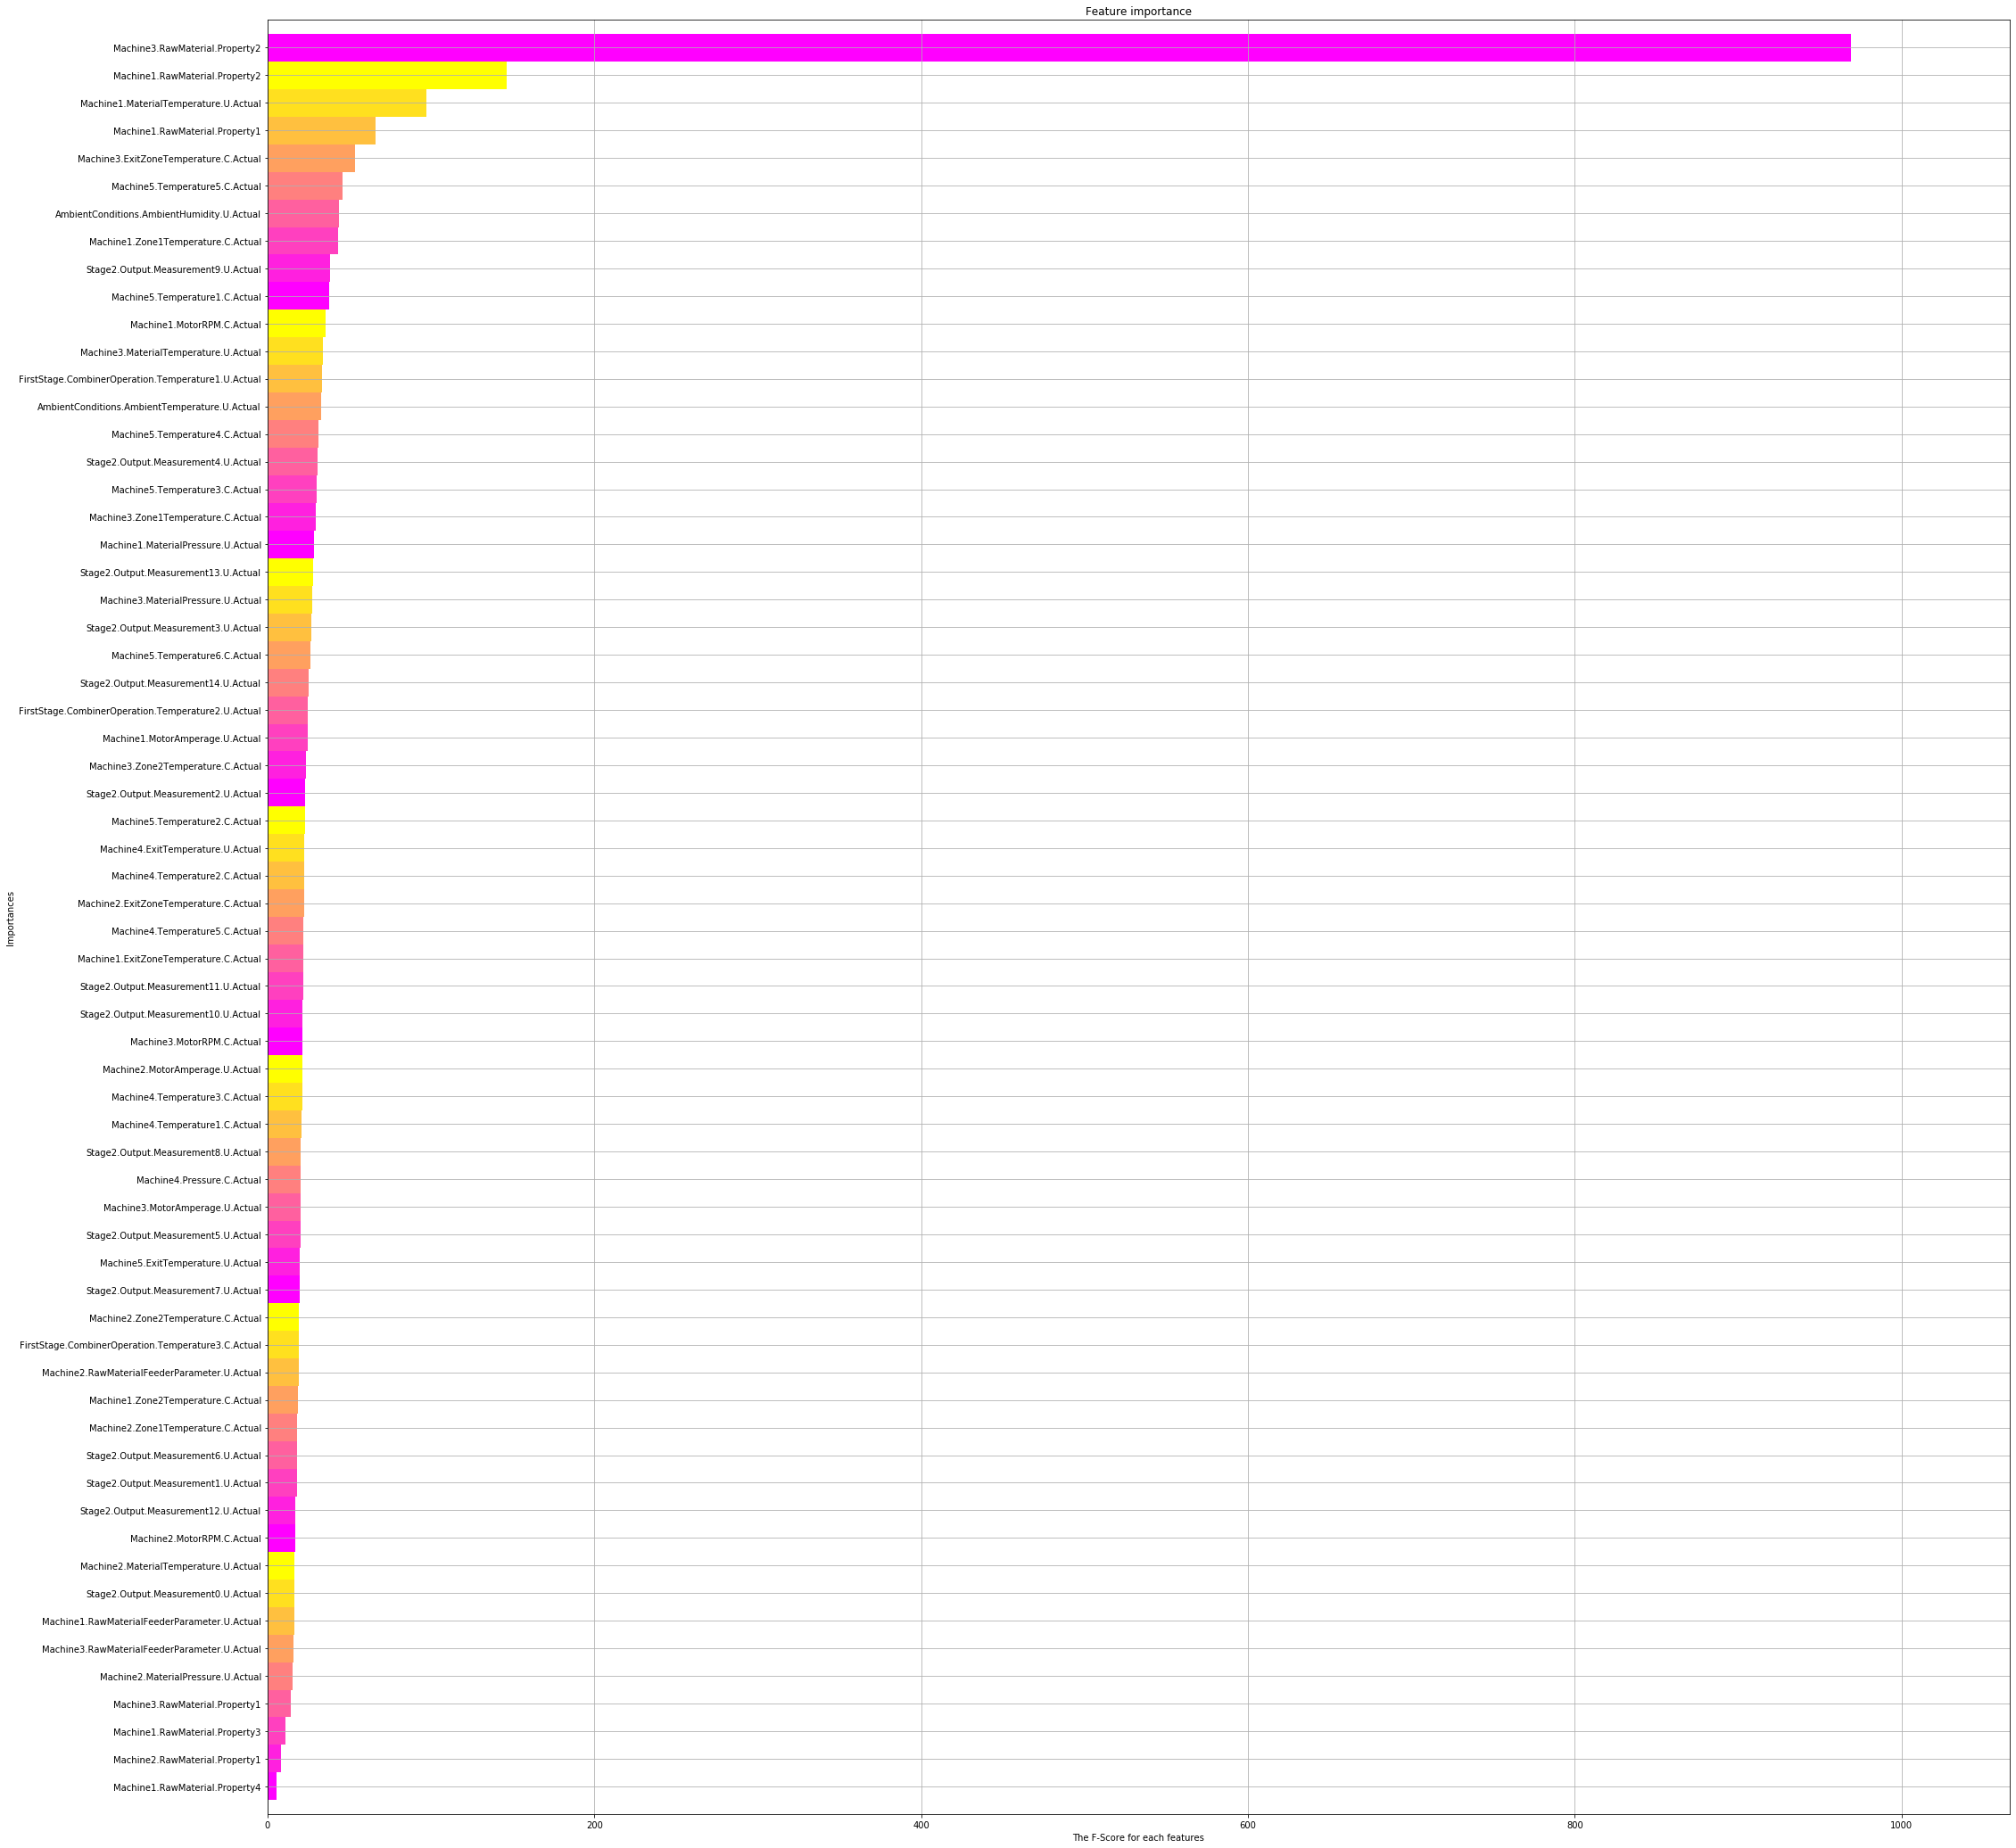

In [40]:
#Significance testing
# Bar plot the feature importances

colors = plt.cm.spring(np.linspace(0, 1, 7))
xgb.plot_importance(model, height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (35, 37)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()


In [26]:
#Gridsearch on parameters

# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

# making a parameters list
#parameters = [{'max_depth' : [1, 10, 5, 7]}]
parameters =[{'n_estimators': [50,100,200]}]

# making a grid search model
grid_search = GridSearchCV(estimator = model_list[14], param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 2, n_jobs = -1)
#n_jobs=-1 means all cores are used


grid_search = grid_search.fit(X_train, y_train)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

#run time 6:59

In [28]:
print(best_parameters)

{'max_depth': 10}

In [94]:

y_pred = model.predict(X_test)

y_pred

array([11.38, 13.88, 16.92, ..., 13.82, 13.27, 13.83])

In [39]:
from sklearn.metrics import mean_squared_error
#Finding the RMSE and R2 score

MSE = mean_squared_error(y_test_list[14], y_pred)
RMSE=np.sqrt(MSE)
RMSE

7.825442476441021

In [28]:
y_test_list[14]

154      15.58
5831     15.74
3848      0.00
33       15.43
5210     15.78
1746     15.76
5502     15.74
10347    15.00
10948    15.10
10132    15.12
12905     0.00
9296     14.98
11744     0.00
7038      0.00
424       0.00
13651     0.00
467      14.39
5244     15.79
3872      0.00
14082     0.00
10286    15.12
675      14.58
1292     14.41
5561     15.72
12035     0.00
7439     15.78
174      15.63
5941     15.72
4066      0.00
7911      0.00
         ...  
2263     14.89
5702     15.75
382      14.30
12189    15.28
247      15.51
11754    15.12
4688     15.75
7747     15.86
9032      0.00
6877     15.72
2054     15.78
14033     0.00
13819     0.00
4324      0.00
799      14.63
6193      0.00
7154     15.64
180      15.77
2206     15.18
10084    15.06
6774     15.82
4070      0.00
8334     15.79
8436     15.80
1218     14.51
10431    14.97
9342     15.02
7158      0.00
9495     15.02
6971     15.87
Name: Stage1.Output.Measurement14.U.Actual, Length: 2818, dtype: float64

In [27]:
y_pred

array([15.57, 15.77,  0.  , ...,  0.  ,  0.  ,  0.  ])

In [80]:
y_test_list[0]

154      12.76
5831     13.04
3848     12.79
33       12.65
5210     13.04
1746     12.89
5502     13.03
10347    12.93
10948    12.96
10132    12.95
12905    12.88
9296     12.94
11744    12.98
7038     13.05
424      13.09
13651    12.90
467      12.70
5244     13.04
3872     12.84
14082    12.61
10286    13.00
675      12.79
1292     12.74
5561     13.02
12035    12.94
7439     13.05
174      12.74
5941     13.03
4066     12.82
7911     13.09
         ...  
2263     13.18
5702     13.04
382      12.69
12189    12.94
247      12.73
11754    12.93
4688     13.02
7747     13.06
9032     13.07
6877     13.01
2054     12.89
14033    12.91
13819    12.90
4324     12.79
799      12.80
6193     13.05
7154     13.03
180      12.76
2206     13.33
10084    12.93
6774     13.05
4070     12.82
8334     13.07
8436     13.09
1218     12.74
10431    12.95
9342     12.92
7158     13.06
9495     12.94
6971     13.07
Name: Stage1.Output.Measurement0.U.Actual, Length: 2818, dtype: float64

In [ ]:
#chi squared

In [52]:
X_train

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
9736,14.04,24.19,12.90,215,980.53,251,1247.52,72.0,71.5,62.96,...,7.76,7.93,5.57,5.65,2.11,1.85,3.77,2.89,7.82,11.71
13074,14.04,24.19,11.54,200,1027.43,247,862.89,72.0,72.3,70.90,...,7.87,7.93,5.52,5.65,2.00,1.85,3.72,2.89,7.77,11.71
12313,13.94,24.33,11.54,200,1027.43,247,1042.61,72.0,72.1,72.52,...,7.92,7.93,5.57,5.65,2.05,1.85,3.72,2.89,8.07,11.71
8883,14.42,23.32,12.90,215,980.53,251,1257.53,72.0,72.5,64.58,...,7.84,7.93,5.55,5.65,2.04,1.85,3.52,2.89,7.83,11.71
4841,16.63,23.67,11.54,200,963.00,247,1267.82,72.0,71.6,71.30,...,7.89,7.93,5.82,5.65,2.06,1.85,3.38,2.89,8.03,11.71
3002,16.83,23.93,11.54,200,963.00,247,1265.71,72.0,71.4,73.59,...,7.91,7.93,5.89,5.65,2.06,1.85,3.49,2.89,7.67,11.71
10800,14.04,23.93,12.59,236,601.11,257,1265.98,72.0,71.6,64.58,...,7.82,7.93,5.57,5.65,2.05,1.85,3.84,2.89,7.74,11.71
7897,14.83,23.36,11.54,200,1027.43,247,1273.54,72.0,71.5,72.25,...,8.03,7.93,5.61,5.65,2.09,1.85,3.50,2.89,8.09,11.71
9537,14.23,24.00,12.90,215,980.53,251,973.60,72.0,71.4,63.64,...,7.82,7.93,5.58,5.65,2.13,1.85,3.72,2.89,7.83,11.71
2930,16.83,23.93,11.54,200,963.00,247,1259.22,72.0,72.6,73.05,...,7.90,7.93,5.76,5.65,2.05,1.85,3.47,2.89,8.00,11.71


In [ ]:
#Prediction horizon

In [ ]:
#Scoring Predictions